In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Correlation between Skewness and magnetic flux imbalance 

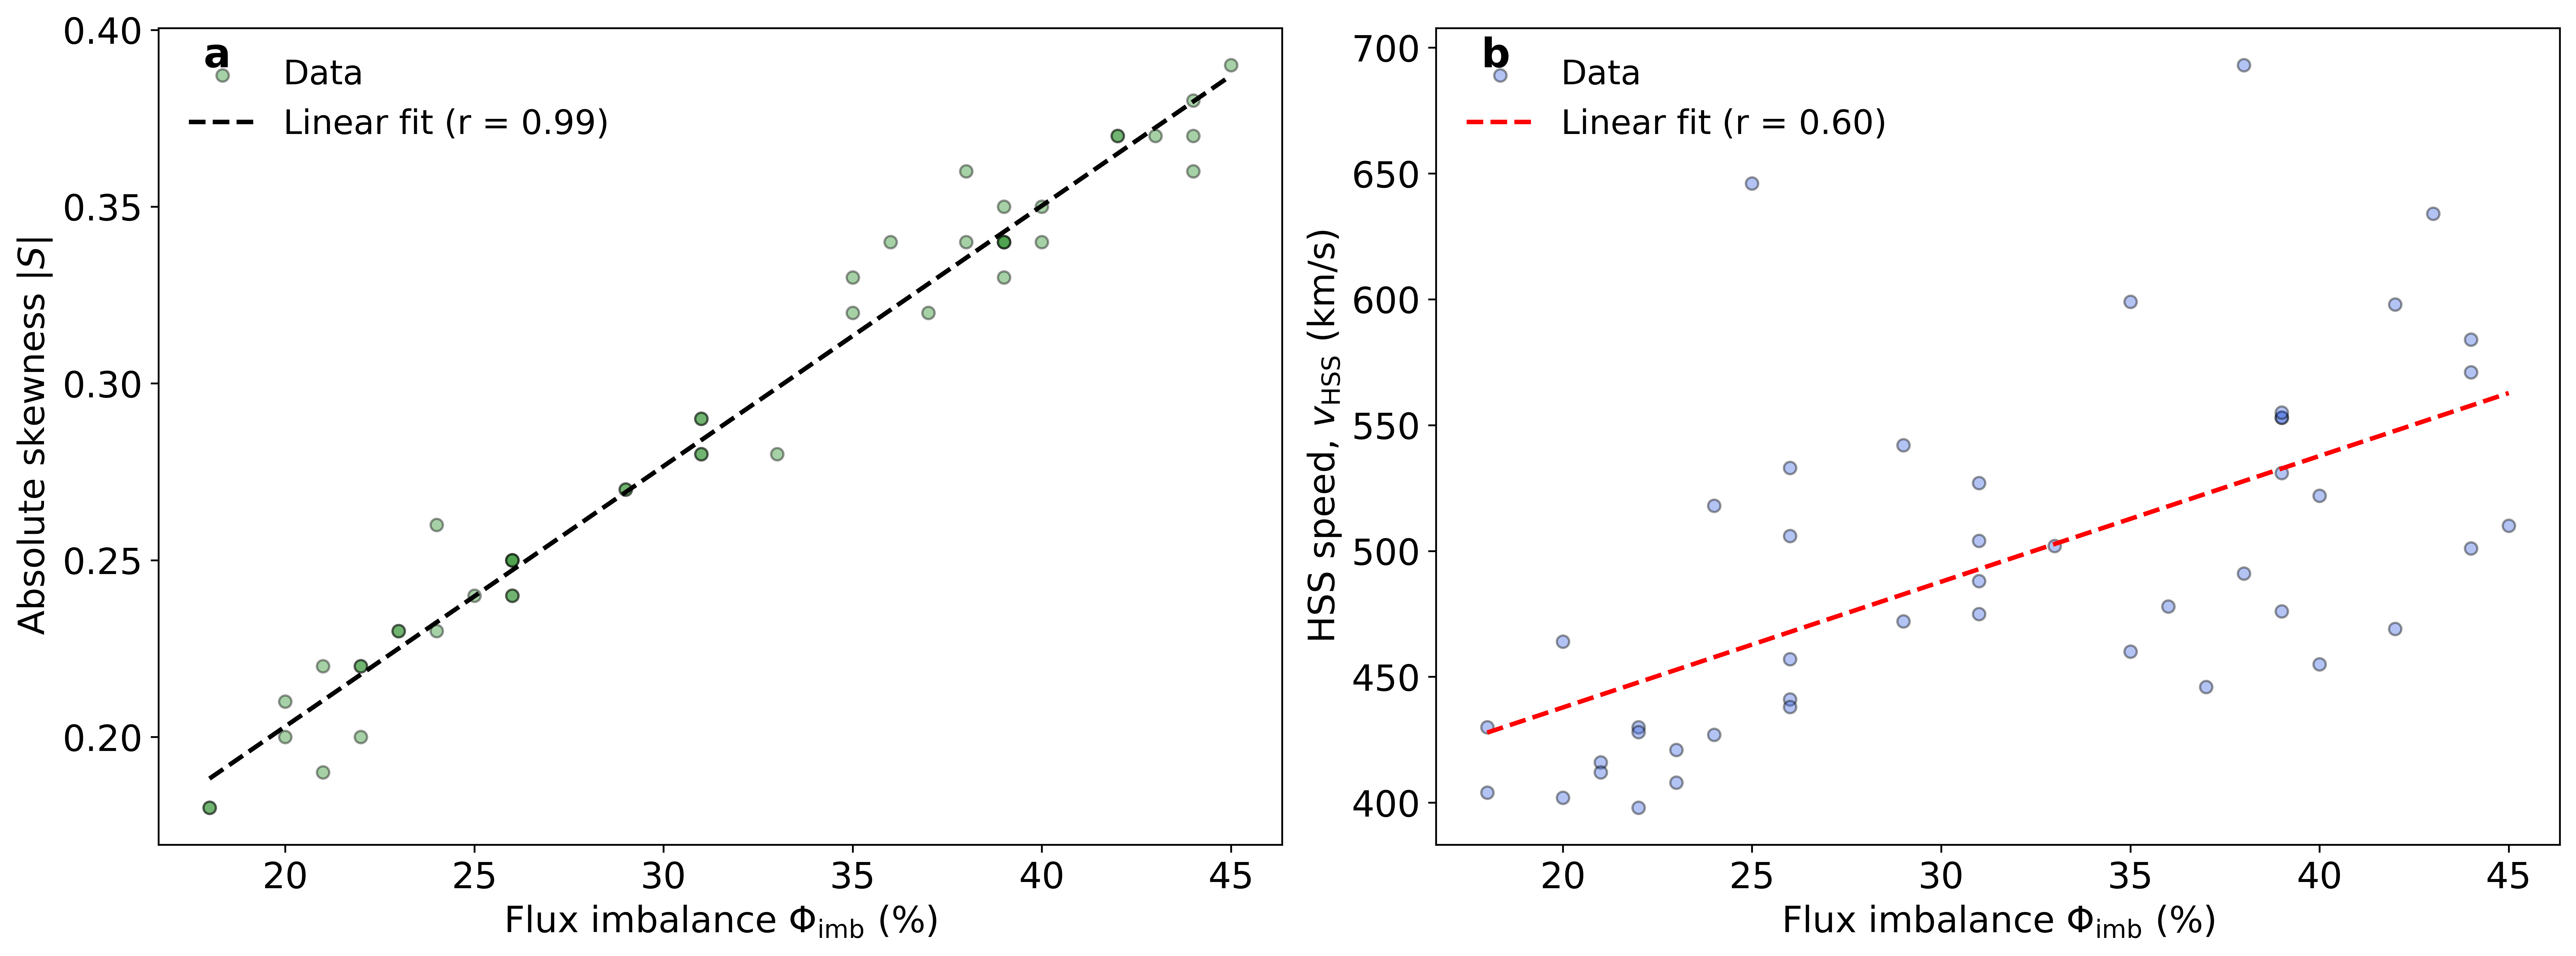

In [7]:
# Data
skewness = [-0.25, -0.33, 0.27, -0.24, 0.20, -0.20, -0.18, -0.26, -0.18, -0.23,
            0.34, 0.36, 0.34, -0.21, -0.25, 0.34, 0.29, -0.28, 0.24, -0.22,
            -0.24, 0.28, 0.37, 0.34, 0.36, 0.33, 0.35, 0.25, 0.37, 0.32,
            -0.32, 0.27, 0.35, 0.37, 0.37, -0.38, 0.39, -0.34, 0.22, -0.34,
            -0.28, 0.29, -0.23, 0.22, 0.23, 0.19]

flux_imbalance = [26, 35, 29, 25, 22, 20, 18, 24, 18, 24, 39, 38, 40, 20, 26, 39, 31, 33, 26, 21,
                  26, 31, 44, 36, 44, 39, 39, 26, 42, 35,
                  37, 29, 40, 43, 42, 44, 45, 39, 22, 38,
                  31, 31, 23, 22, 23, 21]

v_max = [533, 599, 472, 646, 398, 464, 430, 427, 404, 518, 553, 693, 522, 402, 457, 531, 504, 502, 441, 416,
         506, 527, 501, 478, 584, 476, 553, 438, 469, 460,
         446, 542, 455, 634, 598, 571, 510, 555, 430, 491,
         488, 475, 408, 428, 421, 412]

# Process data
x = np.array(flux_imbalance)
y1 = np.abs(np.array(skewness))     # |S|
y2 = np.array(v_max)                # v_HSS

# Linear fits
fit1 = np.polyfit(x, y1, 1)
fit2 = np.polyfit(x, y2, 1)
line_x = np.linspace(min(x), max(x), 100)
line_y1 = np.polyval(fit1, line_x)
line_y2 = np.polyval(fit2, line_x)

# Correlations
r1, _ = pearsonr(x, y1)
r2, _ = pearsonr(x, y2)

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6), dpi=600)

# Plot 1: |Skewness| vs Flux Imbalance
axes[0].scatter(x, y1, s=30, edgecolor='black', color='forestgreen', alpha=0.4, label='Data')
axes[0].plot(line_x, line_y1, 'k--', lw=2, label=f'Linear fit (r = {r1:.2f})')
axes[0].set_xlabel(r'Flux imbalance $\Phi_{\mathrm{imb}}$ (%)', fontsize=16)
axes[0].set_ylabel(r'Absolute skewness $|S|$', fontsize=16)
axes[0].tick_params(labelsize=16)
axes[0].legend(frameon=False, fontsize=15)

# Plot 2: HSS velocity vs Flux Imbalance
axes[1].scatter(x, y2, s=30, edgecolor='black', color='royalblue', alpha=0.4, label='Data')
axes[1].plot(line_x, line_y2, 'r--', lw=2, label=f'Linear fit (r = {r2:.2f})')
axes[1].set_xlabel(r'Flux imbalance $\Phi_{\mathrm{imb}}$ (%)', fontsize=16)
axes[1].set_ylabel(r'HSS speed, $v_{\mathrm{HSS}}$ (km/s)', fontsize=16)
axes[1].tick_params(labelsize=16)
axes[1].legend(frameon=False, fontsize=15)

# Subplot labels
axes[0].text(0.04, 0.99, 'a', transform=axes[0].transAxes,
             fontsize=18, fontweight='bold', va='top')
axes[1].text(0.04, 0.99, 'b', transform=axes[1].transAxes,
             fontsize=18, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig('/Users/khagendrakatwal/Desktop/Solar_Wind_Speed_and_Imbalance_Flux.pdf', dpi=1500)
plt.show()